In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split

ModuleNotFoundError: No module named 'pandas'

In [32]:
df = pd.read_csv(r"C:\Users\272749\Downloads\archive (15)\IMDb Movies India.csv", encoding='latin-1')
df.head()


,Name,Year,Duration,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3
0,,NaN,NaN,Drama,NaN,NaN,J.S. Randhawa,Manmauji,Birbal,Rajendra Bhatia
1,#Gadhvi (He thought he was Gandhi),(2019),109 min,Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid
2,#Homecoming,(2021),90 min,"Drama, Musical",NaN,NaN,Soumyajit Majumdar,Sayani Gupta,Plabita Borthakur,Roy Angana
3,#Yaaram,(2019),110 min,"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor
4,...And Once Again,(2010),105 min,Drama,NaN,NaN,Amol Palekar,Rajat Kapoor,Rituparna Sengupta,Antara Mali


**Information about the dataframe**

In [33]:
df.shape

(15509, 10)

In [34]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 15509 entries, 0 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      15509 non-null  object 
 1   Year      14981 non-null  object 
 2   Duration  7240 non-null   object 
 3   Genre     13632 non-null  object 
 4   Rating    7919 non-null   float64
 5   Votes     7920 non-null   object 
 6   Director  14984 non-null  object 
 7   Actor 1   13892 non-null  object 
 8   Actor 2   13125 non-null  object 
 9   Actor 3   12365 non-null  object 
dtypes: float64(1), object(9)
memory usage: 1.2+ MB


In [35]:
df.describe()



,Rating
count,7919.000000
mean,5.841621
std,1.381777
min,1.100000
25%,4.900000
50%,6.000000
75%,6.800000
max,10.000000


In [36]:

df.isnull().sum()


Name           0
Year         528
Duration    8269
Genre       1877
Rating      7590
Votes       7589
Director     525
Actor 1     1617
Actor 2     2384
Actor 3     3144
dtype: int64

In [37]:
df.dropna(inplace=True)
df.duplicated().sum()

0

In [38]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Name      5659 non-null   object 
 1   Year      5659 non-null   object 
 2   Duration  5659 non-null   object 
 3   Genre     5659 non-null   object 
 4   Rating    5659 non-null   float64
 5   Votes     5659 non-null   object 
 6   Director  5659 non-null   object 
 7   Actor 1   5659 non-null   object 
 8   Actor 2   5659 non-null   object 
 9   Actor 3   5659 non-null   object 
dtypes: float64(1), object(9)
memory usage: 486.3+ KB


In [39]:
df.shape

(5659, 10)

In [40]:
genres = df['Genre'].str.split(', ', expand=True)
genres.head()

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller


In [41]:
gen_count={}
for i in genres:
  for j in genres[i]:
    if j in gen_count:
      gen_count[j]+=1
    else:
      gen_count[j]=1
gen_count


{'Drama': 3796,
 'Comedy': 1344,
 'Horror': 202,
 'Action': 1686,
 'Crime': 875,
 'Thriller': 679,
 'Adventure': 277,
 'Sport': 40,
 'Biography': 115,
 'Documentary': 48,
 'Mystery': 304,
 'Musical': 412,
 'Romance': 1380,
 'Fantasy': 146,
 'Sci-Fi': 32,
 'Family': 416,
 'History': 99,
 'Animation': 40,
 'War': 33,
 'Music': 53,
 None: 4998,
 'News': 1,
 'Western': 1}

In [42]:
df["Genre"].value_counts()

Genre
Drama                              844
Drama, Romance                     332
Action, Crime, Drama               329
Action, Drama                      206
Comedy, Drama                      205
                                  ... 
Comedy, Crime, Musical               1
History, Romance                     1
Drama, History, Sport                1
Animation, Comedy, Drama             1
Documentary, Biography, Musical      1
Name: count, Length: 376, dtype: int64

In [43]:
df["Votes"].head(10)

1         8
3        35
5       827
6     1,086
8       326
9        11
10       17
11       59
12      983
13      512
Name: Votes, dtype: object

In [44]:
df["Director"].nunique()

2431

In [45]:
df["Director"].value_counts()

Director
David Dhawan            41
Mahesh Bhatt            39
Ram Gopal Varma         33
Hrishikesh Mukherjee    33
Shakti Samanta          33
                        ..
Sriram Raja              1
Randeep Jha              1
Vicky Bhardwaj           1
Salar Shaikh             1
Mozez Singh              1
Name: count, Length: 2431, dtype: int64

In [46]:
pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()

Mithun Chakraborty    160
Amitabh Bachchan      148
Dharmendra            146
Ashok Kumar           124
Akshay Kumar          120
                     ... 
Rajeev Dassani          1
Rehaan Engineer         1
Glenn                   1
Pernia Qureshi          1
Shatakshi Gupta         1
Name: count, Length: 5041, dtype: int64

In [47]:
df["Duration(Min)"]=df["Duration"].str.split(' ', expand=True)[0]
df.drop("Duration", axis=1, inplace=True)




In [48]:
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration(Min)
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82


In [49]:
df["Duration(Min)"]=df["Duration(Min)"].astype(int)


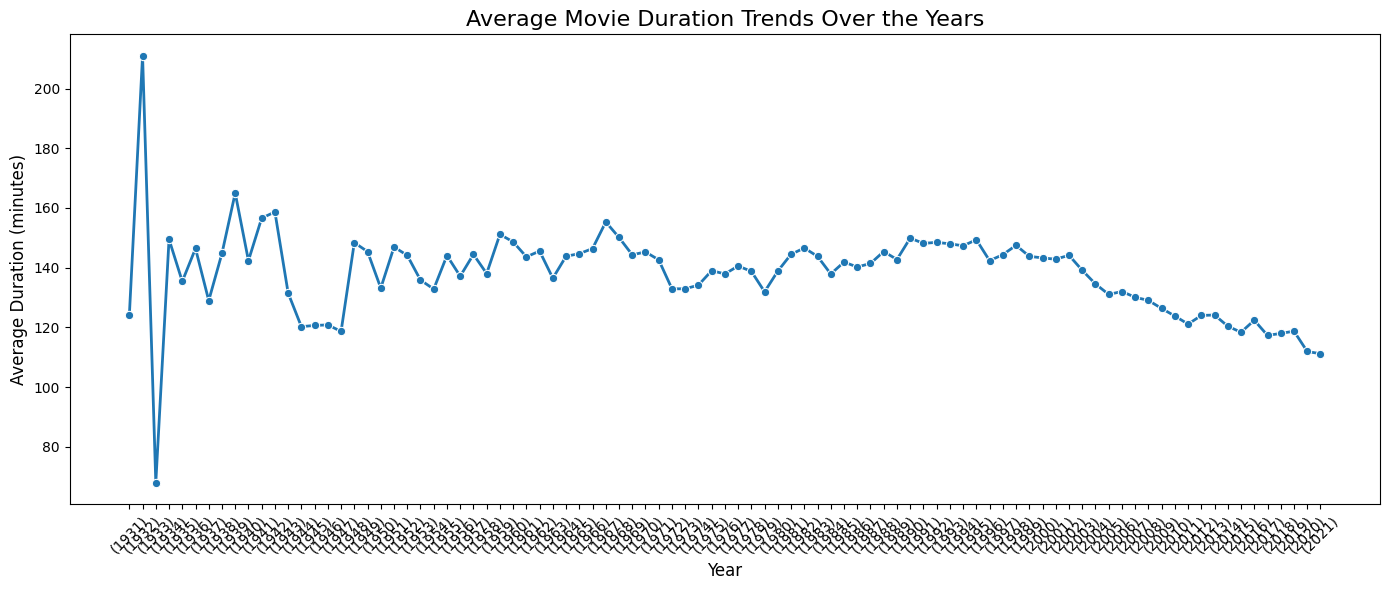

In [50]:
df_grouped = df.groupby('Year')['Duration(Min)'].mean().reset_index()
plt.figure(figsize=(14, 6))  
ax = sns.lineplot(data=df_grouped, x='Year', y='Duration(Min)', marker='o', linewidth=2)
ax.set_title("Average Movie Duration Trends Over the Years", fontsize=16)
ax.set_xlabel("Year", fontsize=12)
ax.set_ylabel("Average Duration (minutes)", fontsize=12)

plt.xticks(rotation=45, fontsize=10)
plt.yticks(fontsize=10)
plt.tight_layout()
plt.show()


In [51]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 5659 entries, 1 to 15508
Data columns (total 10 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Name           5659 non-null   object 
 1   Year           5659 non-null   object 
 2   Genre          5659 non-null   object 
 3   Rating         5659 non-null   float64
 4   Votes          5659 non-null   object 
 5   Director       5659 non-null   object 
 6   Actor 1        5659 non-null   object 
 7   Actor 2        5659 non-null   object 
 8   Actor 3        5659 non-null   object 
 9   Duration(Min)  5659 non-null   int32  
dtypes: float64(1), int32(1), object(8)
memory usage: 464.2+ KB


Text(0, 0.5, 'Average Duration(in minutes)')

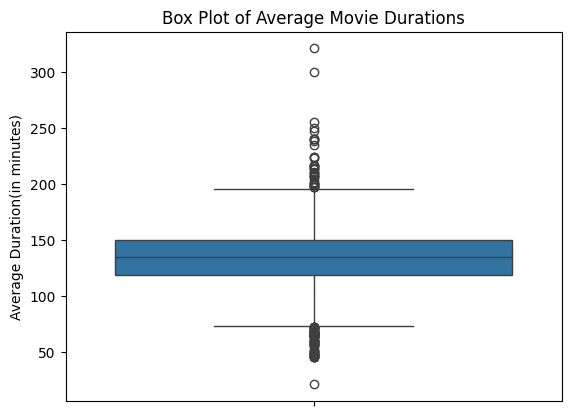

In [52]:
ax = sns.boxplot(data=df, y='Duration(Min)')
ax.set_title("Box Plot of Average Movie Durations")
ax.set_ylabel('Average Duration(in minutes)')


In [53]:
Q1 = df['Duration(Min)'].quantile(0.25)
Q3 = df['Duration(Min)'].quantile(0.75)
IQR = Q3 - Q1
lower= Q1 - 1.5 * IQR
upper = Q3 + 1.5 * IQR
df = df[(df['Duration(Min)'] >= lower) & (df['Duration(Min)'] <= upper)]
df.head(11)

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration(Min)
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82
9,@Andheri,(2014),"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,116
10,1:1.6 An Ode to Lost Love,(2004),Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,96
11,1:13:7 Ek Tera Saath,(2016),Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,120
12,100 Days,(1991),"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,161
13,100% Love,(2012),"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,166


C:\Users\272749\AppData\Local\Temp\ipykernel_15844\203880374.py:7: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  ax.set_xticklabels(labels=genreLabels, rotation=90)


[Text(0, 0, 'Action'),
 Text(1, 0, 'Adventure'),
 Text(2, 0, 'Animation'),
 Text(3, 0, 'Biography'),
 Text(4, 0, 'Comedy'),
 Text(5, 0, 'Crime'),
 Text(6, 0, 'Documentary'),
 Text(7, 0, 'Drama'),
 Text(8, 0, 'Family'),
 Text(9, 0, 'Fantasy'),
 Text(10, 0, 'History'),
 Text(11, 0, 'Horror'),
 Text(12, 0, 'Music'),
 Text(13, 0, 'Musical'),
 Text(14, 0, 'Mystery'),
 Text(15, 0, 'News'),
 Text(16, 0, 'Romance'),
 Text(17, 0, 'Sci-Fi'),
 Text(18, 0, 'Sport'),
 Text(19, 0, 'Thriller'),
 Text(20, 0, 'War'),
 Text(21, 0, 'Western')]

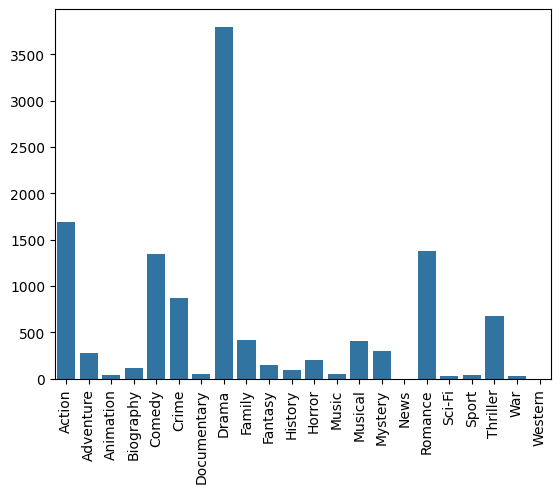

In [54]:
filtered_gen_count = {k: v for k, v in gen_count.items() if k is not None}
sorted_items = sorted(filtered_gen_count.items()) 

genreLabels, genreCounts = zip(*sorted_items)

ax = sns.barplot(x=genreLabels, y=genreCounts)
ax.set_xticklabels(labels=genreLabels, rotation=90)


Text(0.5, 1.0, 'Distribution of Movie Ratings')

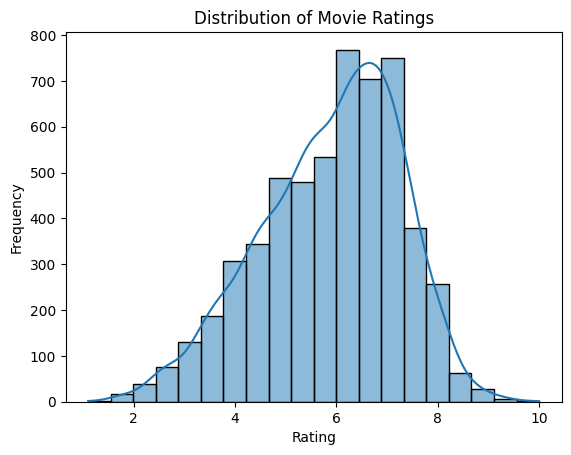

In [55]:
ax = sns.histplot(data = df, x = "Rating", bins = 20, kde = True)
ax.set_xlabel('Rating')
ax.set_ylabel('Frequency')
ax.set_title('Distribution of Movie Ratings')


Text(0.5, 1.0, 'Box Plot of Movie Ratings')

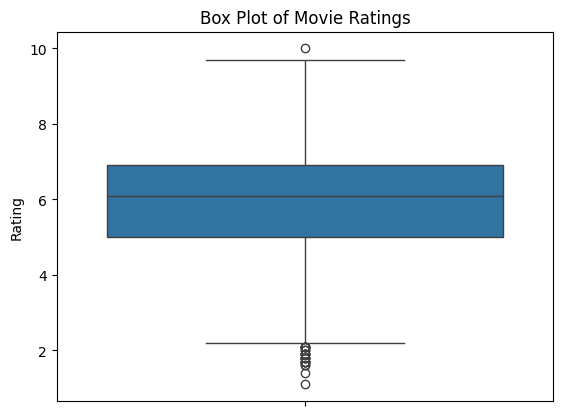

In [56]:
ax = sns.boxplot(data=df, y='Rating')
ax.set_ylabel('Rating')
ax.set_title('Box Plot of Movie Ratings')


In [57]:
reating_votes=df.groupby("Rating")["Votes"].sum().reset_index()
reating_votes

,Rating,Votes
0,1.1,"67,785"
1,1.4,"3,899"
2,1.6,43774
3,1.7,"6248,186275446,655"
4,1.8,"7,840162,455262730"
...,...,...
78,9.2,36
79,9.3,74679
80,9.4,471816
81,9.7,7


Text(0.5, 1.0, 'Total Votes per Rating')

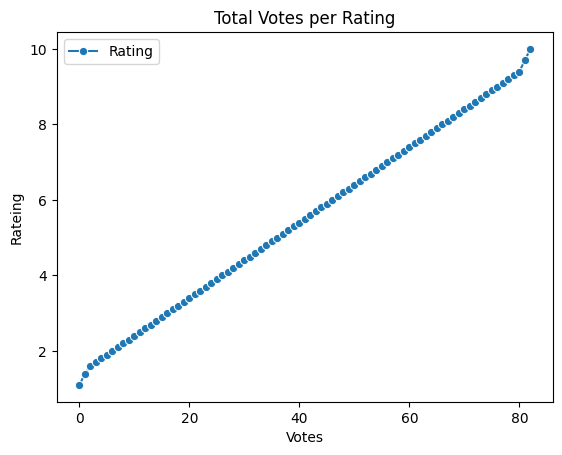

In [58]:
sns.lineplot(data=reating_votes,marker="o")
plt.xlabel("Votes")
plt.ylabel("Rateing")
plt.title("Total Votes per Rating")

In [59]:
top_20_director=df["Director"].value_counts().head(20)
top_20_director

Director
David Dhawan                41
Mahesh Bhatt                39
Hrishikesh Mukherjee        33
Shakti Samanta              33
Ram Gopal Varma             33
Vikram Bhatt                30
Priyadarshan                29
Basu Chatterjee             23
Rama Rao Tatineni           23
Yash Chopra                 22
K. Bapaiah                  22
Harmesh Malhotra            21
Kanti Shah                  21
Shyam Benegal               21
Shyam Ramsay                20
Abbas Alibhai Burmawalla    18
Mahesh Manjrekar            18
Manmohan Desai              18
Raj Khosla                  18
Subhash Ghai                18
Name: count, dtype: int64

C:\Users\272749\AppData\Local\Temp\ipykernel_15844\3816376088.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=top_20_director,palette='viridis')


Text(0.5, 1.0, 'Top 20 Directors by Frequency of Movies')

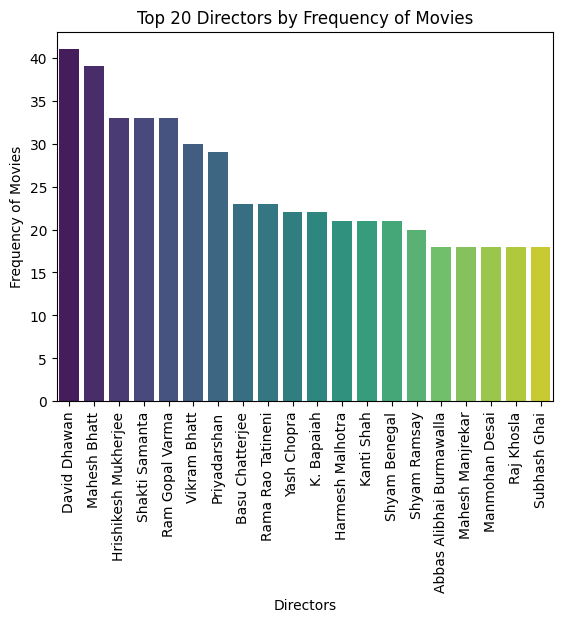

In [60]:
sns.barplot(data=top_20_director,palette='viridis')
plt.xticks(rotation=90)
plt.xlabel("Directors")
plt.ylabel("Frequency of Movies")
plt.title("Top 20 Directors by Frequency of Movies")

In [71]:
genres = df['Genre'].str.split(', ', expand=True)
genres

,0,1,2
1,Drama,None,None
3,Comedy,Romance,None
5,Comedy,Drama,Musical
6,Drama,Romance,War
8,Horror,Mystery,Thriller
...,...,...,...
15493,Drama,None,None
15494,Biography,Drama,History
15503,Action,Crime,Drama
15505,Action,Drama,None


In [82]:
actors = pd.concat([df['Actor 1'], df['Actor 2'], df['Actor 3']]).dropna().value_counts()
actors

Mithun Chakraborty    158
Dharmendra            143
Amitabh Bachchan      143
Ashok Kumar           124
Akshay Kumar          120
                     ... 
Mala Mukherjee          1
Roshan Mathew           1
Priya Bathija           1
Plabita Borthakur       1
Shatakshi Gupta         1
Name: count, Length: 4892, dtype: int64

In [84]:
df["Actor"] = df['Actor 1'] + ', ' + df['Actor 2'] + ', ' + df['Actor 3']
df["Directors"] = df['Director'].astype('category').cat.codes
df["Genres"] = df['Genre'].astype('category').cat.codes
df["Actors"] = df['Actor'].astype('category').cat.codes

In [86]:
df.head()

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration(Min),directors,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109,NaN,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3805
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110,NaN,"Prateik, Ishita Raj, Siddhant Kapoor",1306,182,3280
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147,NaN,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1496,155,1098
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142,NaN,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2001,283,2047
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82,NaN,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5464


In [87]:
Q1 = df['Genres'].quantile(0.25)
Q3 = df['Genres'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Genres'] >= lower_bound) & (df['Genres'] <= upper_bound)]

In [89]:
df.head(10)

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration(Min),directors,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109,NaN,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3805
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110,NaN,"Prateik, Ishita Raj, Siddhant Kapoor",1306,182,3280
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147,NaN,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1496,155,1098
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142,NaN,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2001,283,2047
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82,NaN,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5464
9,@Andheri,(2014),"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,116,NaN,"Augustine, Fathima Babu, Byon",388,37,954
10,1:1.6 An Ode to Lost Love,(2004),Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,96,NaN,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1056,224,3810
11,1:13:7 Ek Tera Saath,(2016),Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,120,NaN,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",257,310,3168
12,100 Days,(1991),"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,161,NaN,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1343,317,1865
13,100% Love,(2012),"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,166,NaN,"Jeet, Koyel Mallick, Sujoy Ghosh",1473,157,1946


Text(0.5, 1.0, 'Box Plot of Directors')

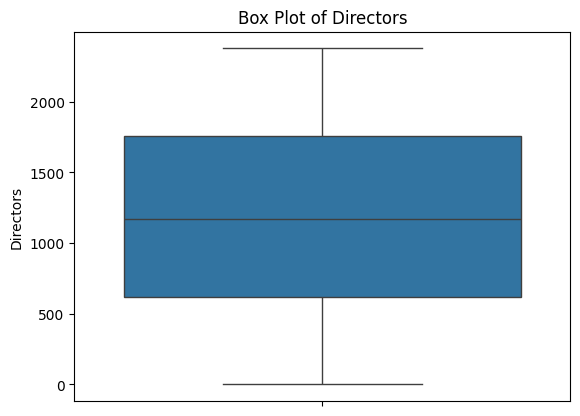

In [92]:
ax = sns.boxplot(data=df, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Directors')


In [93]:
Q1 = df['Directors'].quantile(0.25)
Q3 = df['Directors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Directors'] >= lower_bound) & (df['Directors'] <= upper_bound)]

In [94]:
Q1 = df['Actors'].quantile(0.25)
Q3 = df['Actors'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
df = df[(df['Actors'] >= lower_bound) & (df['Actors'] <= upper_bound)]

In [96]:
df.head(10)

,Name,Year,Genre,Rating,Votes,Director,Actor 1,Actor 2,Actor 3,Duration(Min),directors,Actor,Directors,Genres,Actors
1,#Gadhvi (He thought he was Gandhi),(2019),Drama,7.0,8,Gaurav Bakshi,Rasika Dugal,Vivek Ghamande,Arvind Jangid,109,NaN,"Rasika Dugal, Vivek Ghamande, Arvind Jangid",610,224,3805
3,#Yaaram,(2019),"Comedy, Romance",4.4,35,Ovais Khan,Prateik,Ishita Raj,Siddhant Kapoor,110,NaN,"Prateik, Ishita Raj, Siddhant Kapoor",1306,182,3280
5,...Aur Pyaar Ho Gaya,(1997),"Comedy, Drama, Musical",4.7,827,Rahul Rawail,Bobby Deol,Aishwarya Rai Bachchan,Shammi Kapoor,147,NaN,"Bobby Deol, Aishwarya Rai Bachchan, Shammi Kapoor",1496,155,1098
6,...Yahaan,(2005),"Drama, Romance, War",7.4,"1,086",Shoojit Sircar,Jimmy Sheirgill,Minissha Lamba,Yashpal Sharma,142,NaN,"Jimmy Sheirgill, Minissha Lamba, Yashpal Sharma",2001,283,2047
8,?: A Question Mark,(2012),"Horror, Mystery, Thriller",5.6,326,Allyson Patel,Yash Dave,Muntazir Ahmad,Kiran Bhatia,82,NaN,"Yash Dave, Muntazir Ahmad, Kiran Bhatia",133,314,5464
9,@Andheri,(2014),"Action, Crime, Thriller",4.0,11,Biju Bhaskar Nair,Augustine,Fathima Babu,Byon,116,NaN,"Augustine, Fathima Babu, Byon",388,37,954
10,1:1.6 An Ode to Lost Love,(2004),Drama,6.2,17,Madhu Ambat,Rati Agnihotri,Gulshan Grover,Atul Kulkarni,96,NaN,"Rati Agnihotri, Gulshan Grover, Atul Kulkarni",1056,224,3810
11,1:13:7 Ek Tera Saath,(2016),Horror,5.9,59,Arshad Siddiqui,Pankaj Berry,Anubhav Dhir,Hritu Dudani,120,NaN,"Pankaj Berry, Anubhav Dhir, Hritu Dudani",257,310,3168
12,100 Days,(1991),"Horror, Romance, Thriller",6.5,983,Partho Ghosh,Jackie Shroff,Madhuri Dixit,Javed Jaffrey,161,NaN,"Jackie Shroff, Madhuri Dixit, Javed Jaffrey",1343,317,1865
13,100% Love,(2012),"Comedy, Drama, Romance",5.7,512,Rabi Kinagi,Jeet,Koyel Mallick,Sujoy Ghosh,166,NaN,"Jeet, Koyel Mallick, Sujoy Ghosh",1473,157,1946


Text(0.5, 1.0, 'Box Plot of Actors')

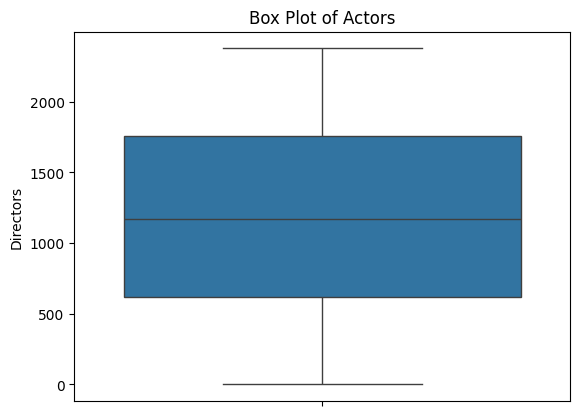

In [98]:
ax = sns.boxplot(data=df, y='Directors')
ax.set_ylabel('Directors')
ax.set_title('Box Plot of Actors')


Text(0.5, 1.0, 'Box Plot of Actors')

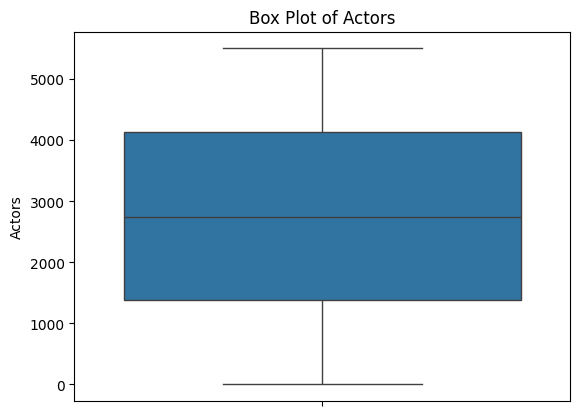

In [99]:
ax = sns.boxplot(data=df, y='Actors')
ax.set_ylabel('Actors')
ax.set_title('Box Plot of Actors')


In [111]:
Input = df.drop(['Name', 'Genre', 'Rating', 'Director', 'Actor 1', 'Actor 2', 'Actor 3', 'Actor'], axis=1)
Output = df['Rating']

In [117]:
Input.head()

,Year,Votes,Duration(Min),directors,Directors,Genres,Actors
1,(2019),8,109,NaN,610,224,3805
3,(2019),35,110,NaN,1306,182,3280
5,(1997),827,147,NaN,1496,155,1098
6,(2005),"1,086",142,NaN,2001,283,2047
8,(2012),326,82,NaN,133,314,5464


In [118]:
Output.head()

1    7.0
3    4.4
5    4.7
6    7.4
8    5.6
Name: Rating, dtype: float64